In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [126]:
# Popularity and profit statistics
success_data = pd.read_pickle('success.pkl')
popularity_data = success_data[['popularity']]
profit_data = success_data[['profit']]

In [73]:
popularity_data

,popularity
0,32.985763
1,28.419936
2,13.112507
3,11.173104
4,9.335014
...,...
1282,1.549139
1283,1.910465
1284,1.778746
1285,1.198849


In [4]:
factors = pd.read_pickle('factors.pkl')

### **DIRECTORS**

In [5]:
director = pd.read_pickle('director.pkl')
director

,director
0,Colin Trevorrow
1,George Miller
2,Robert Schwentke
3,J.J. Abrams
4,James Wan
...,...
1282,Guy Hamilton
1283,Terence Young
1284,Peter R. Hunt
1285,John Carpenter


In [6]:
director.describe()

,director
count,1411
unique,835
top,John Carpenter
freq,12


### **GENRE**


In [7]:
genre = pd.read_pickle('encoded_genre.pkl')
genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1283,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1284,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1285,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [8]:
genre.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
count,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287,1287
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,872,990,1179,873,1094,1272,752,1124,1133,1286,1252,1148,1249,1189,1091,1078,888,1255,1274


since there is only one movie that is classified as foreign, we decided to make the executive decision to remove this column from the list of genres since we are unable to accurately anaylse how the genre "foreign" can affect the success rate of movies due to the lack of data

### **seasonaility test for mean popularity of movies over the years**

In [138]:
data = factors[['genres', 'release_year']]
data = pd.concat([data, popularity_data], axis=1)
data = data.explode("genres")

#dropping the genre "foreign"
data = data.drop(data[data['genres'] == 'Foreign'].index)

In [137]:
# Check if the row has been removed
if "Foreign" not in data['genres'].tolist():
    print('The row has been removed.')
else:
    print('The row is still in the dataset.')

The row has been removed.


In [139]:
data

,genres,release_year,popularity
0,Action,2015,32.985763
0,Adventure,2015,32.985763
0,Science Fiction,2015,32.985763
0,Thriller,2015,32.985763
1,Action,2015,28.419936
...,...,...,...
1284,Action,1969,1.778746
1284,Thriller,1969,1.778746
1285,Horror,1978,1.198849
1285,Thriller,1978,1.198849


<Axes: title={'center': 'Mean Popularity of Genres over Time'}, xlabel='release_year'>

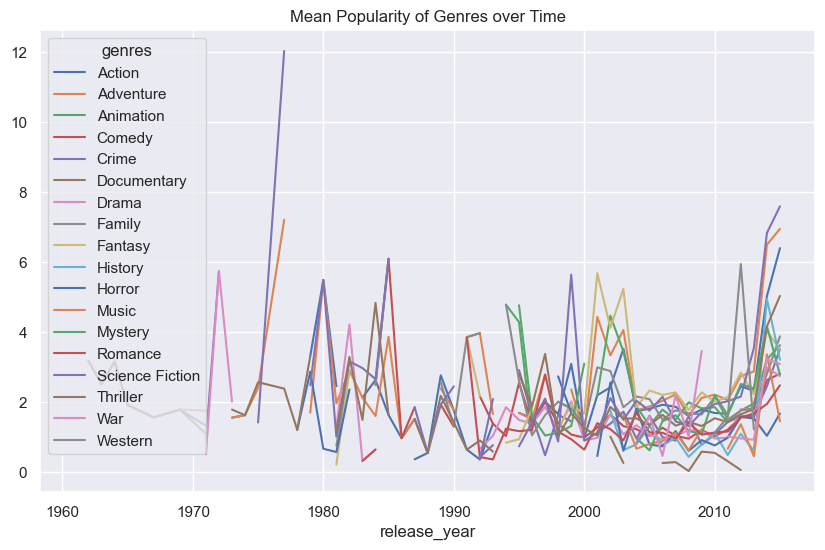

In [140]:
grouped_data = data.groupby(['release_year', 'genres'], as_index=False).mean()

# pivot the data to create a matrix of year vs. genre mean popularity
pivoted_data = grouped_data.pivot(index='release_year', columns='genres', values='popularity')

# plot the pivoted data
pivoted_data.plot(kind='line', figsize=(10,6), title='Mean Popularity of Genres over Time')

Text(0, 0.5, 'Popularity')

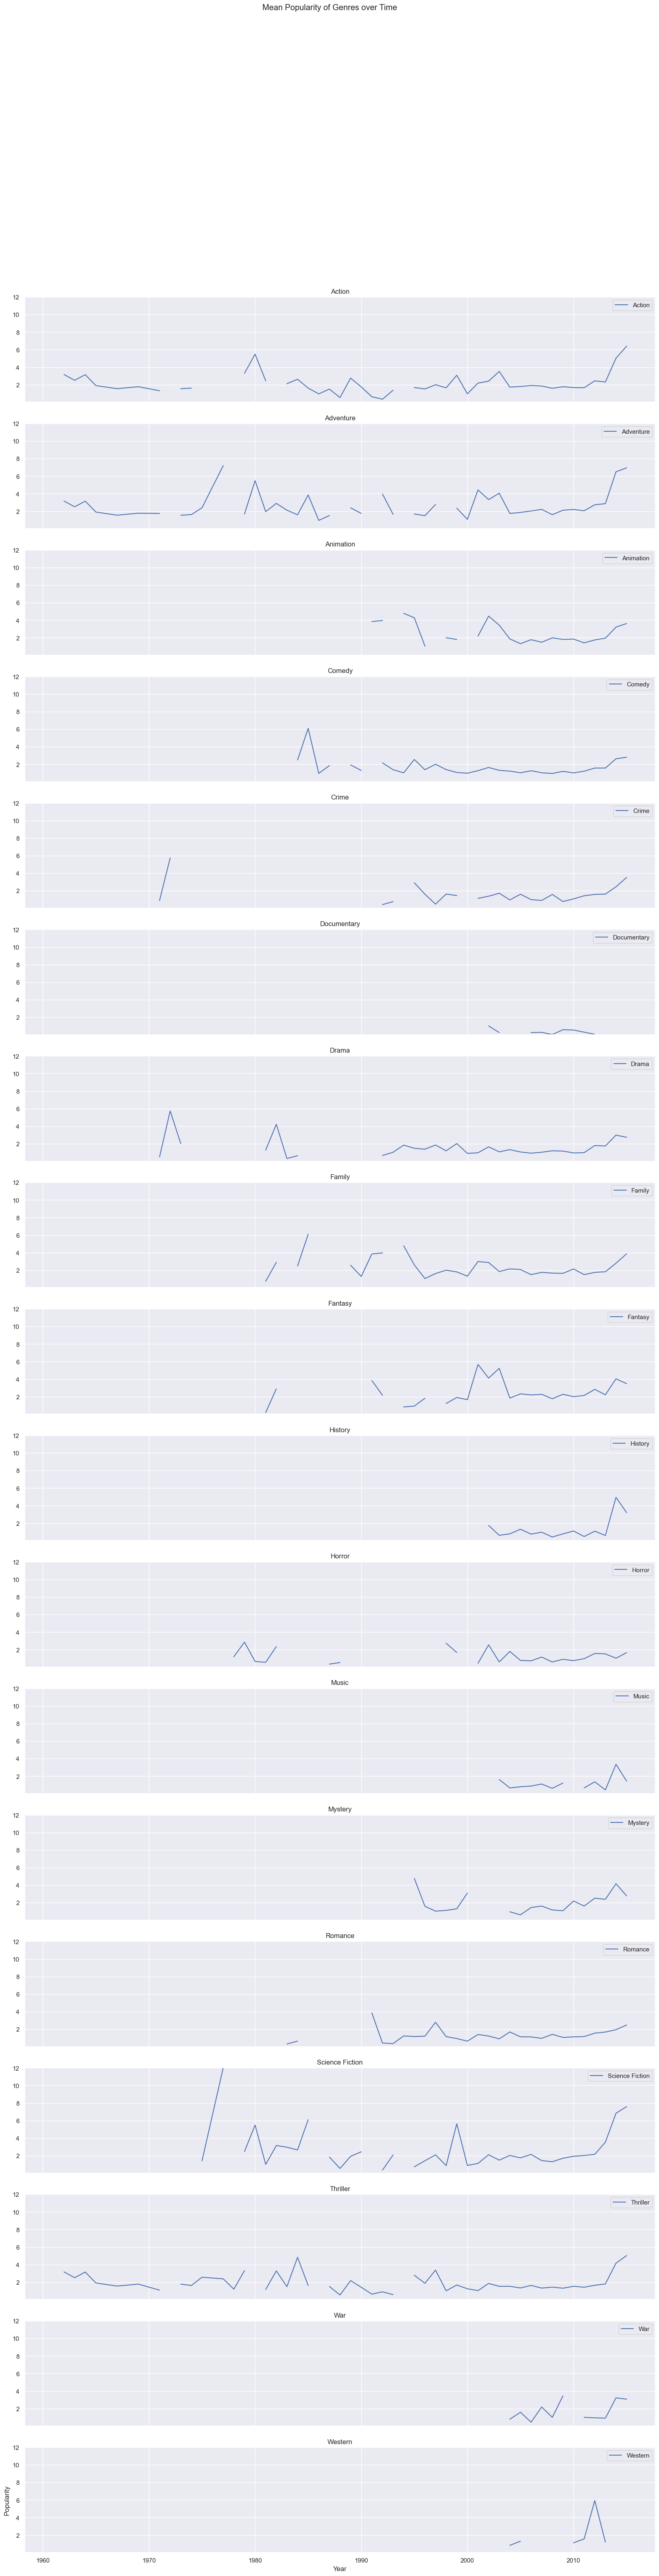

In [141]:
# create a separate subplot for each column
fig, axs = plt.subplots(nrows=len(pivoted_data.columns), figsize=(20, 4*len(pivoted_data.columns)), sharex=True)

# loop through each column and plot the data on the corresponding subplot
for i, col in enumerate(pivoted_data.columns):
    axs[i].plot(pivoted_data.index, pivoted_data[col], label=col)
    axs[i].legend()
    axs[i].set_title(col)

    #standardising the scale on the y axis
    axs[i].set_ylim([pivoted_data.min().min(), pivoted_data.max().max()])

# set the overall title and axis labels
fig.suptitle('Mean Popularity of Genres over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')

### **seasonality test for mean profit over the years**

In [143]:
data1 = factors[['genres', 'release_year']]
data1 = pd.concat([data1, profit_data], axis=1)
data1 = data1.explode("genres")


#dropping the genre "foreign"
data1 = data1.drop(data1[data1['genres'] == 'Foreign'].index)

In [144]:
# Check if the row has been removed
if "Foreign" not in data1['genres'].tolist():
    print('The row has been removed.')
else:
    print('The row is still in the dataset.')

The row has been removed.


In [145]:
data1

,genres,release_year,profit
0,Action,2015,1.363529e+09
0,Adventure,2015,1.363529e+09
0,Science Fiction,2015,1.363529e+09
0,Thriller,2015,1.363529e+09
1,Action,2015,2.284364e+08
...,...,...,...
1284,Action,1969,7.497449e+07
1284,Thriller,1969,7.497449e+07
1285,Horror,1978,6.970000e+07
1285,Thriller,1978,6.970000e+07


<Axes: title={'center': 'Mean Profit of Genres over Time'}, xlabel='release_year'>

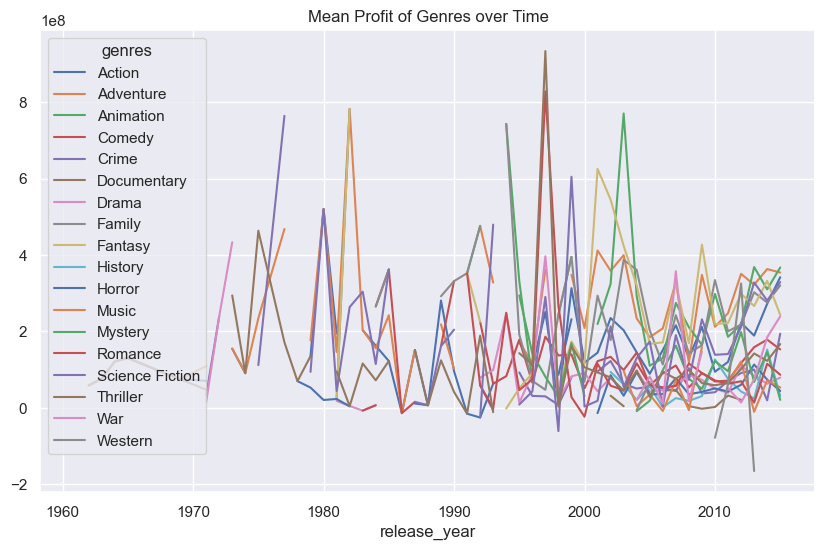

In [146]:
grouped_data1 = data1.groupby(['release_year', 'genres'], as_index=False).mean()

# pivot the data to create a matrix of year vs. genre mean popularity
pivoted_data1 = grouped_data1.pivot(index='release_year', columns='genres', values='profit')

# plot the pivoted data
pivoted_data1.plot(kind='line', figsize=(10,6), title='Mean Profit of Genres over Time')

Text(0, 0.5, 'Profit')

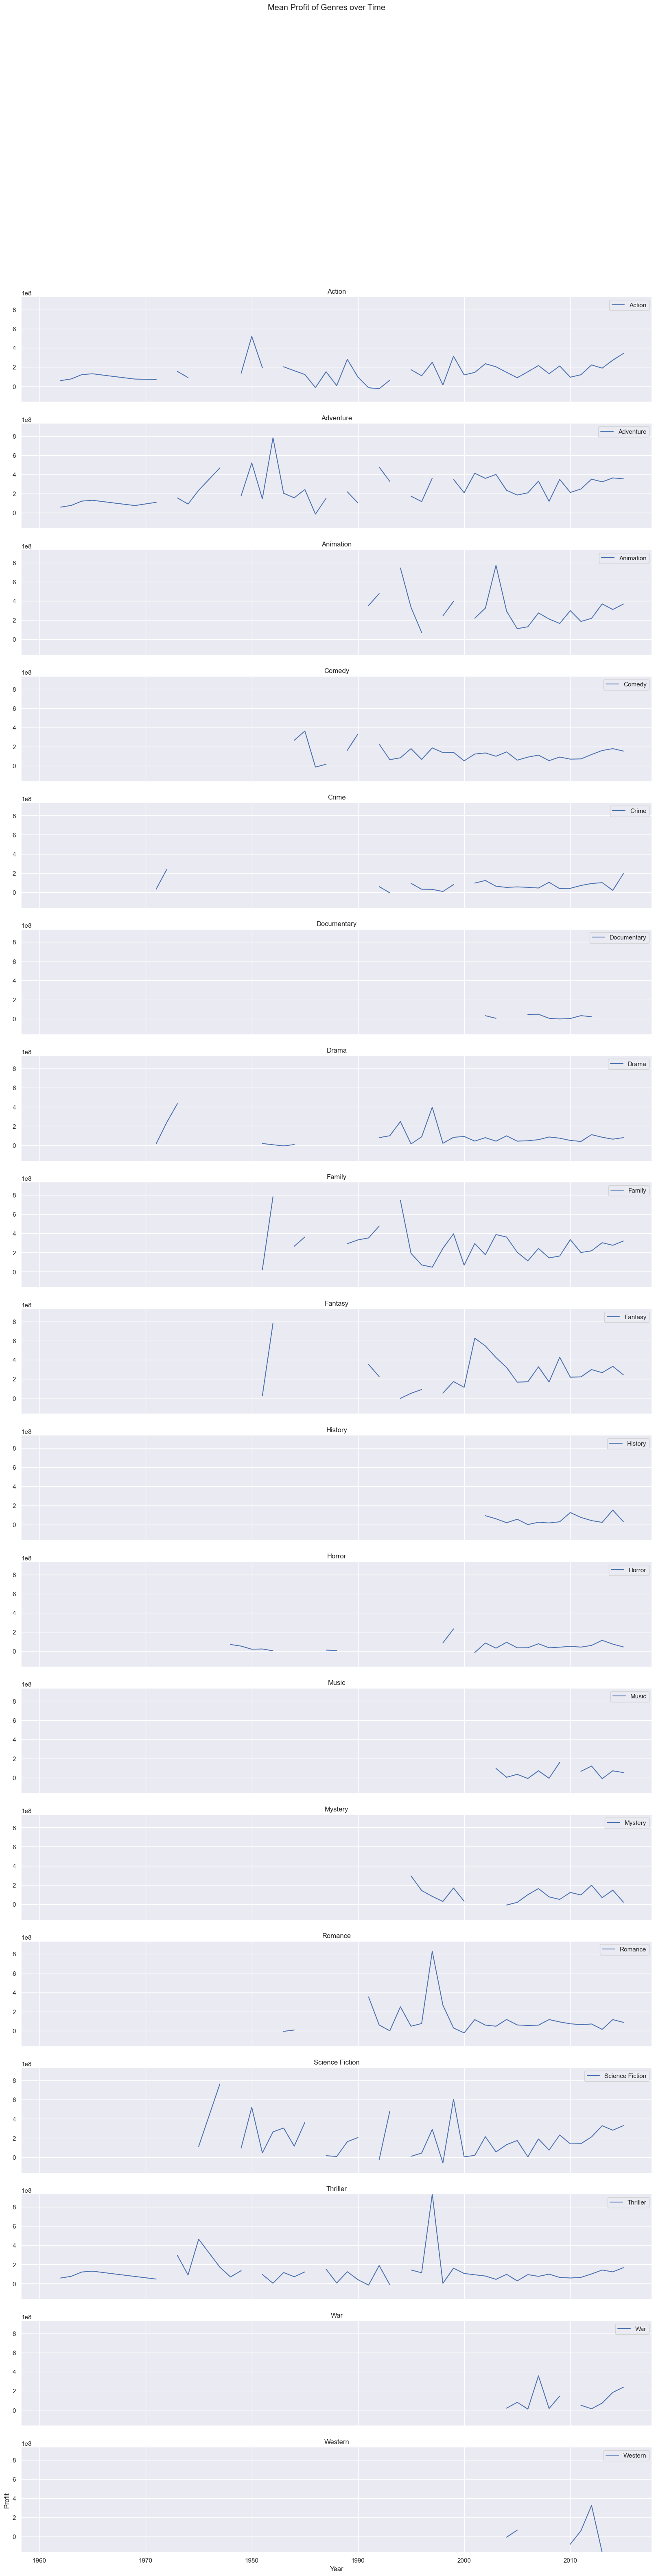

In [147]:
# create a separate subplot for each column
fig, axs = plt.subplots(nrows=len(pivoted_data1.columns), figsize=(20, 4*len(pivoted_data1.columns)), sharex=True)

# loop through each column and plot the data on the corresponding subplot
for i, col in enumerate(pivoted_data1.columns):
    axs[i].plot(pivoted_data1.index, pivoted_data1[col], label=col)
    axs[i].legend()
    axs[i].set_title(col)

    #standardising the scale on the y axis
    axs[i].set_ylim([pivoted_data1.min().min(), pivoted_data1.max().max()])

# set the overall title and axis labels
fig.suptitle('Mean Profit of Genres over Time')
plt.xlabel('Year')
plt.ylabel('Profit')

In [107]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [99]:
#Define the architecture of the neural network by creating an instance of the Sequential class and adding layers to it:

model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=4))
model.add(Dense(units=1, activation='sigmoid'))


In [100]:
#compile the model by specifying the optimizer, loss function, and metrics:
#use the Adam optimizer, binary cross-entropy loss function (since we're doing binary classification), and accuracy metric.

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
# create appropriate datasets for Train and Test in an 80:20 ratio 
# Train Set : 80%
popularity_train, popularity_test, genre_train, genre_test = train_test_split(popularity_data, genre, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
popularity_train, popularity_val, genre_train, genre_val = train_test_split(popularity_train, genre_train, test_size=0.2, random_state=42)

# make training, testing and validation data in the form of NumPy arrays
popularity_train = np.asarray(popularity_train)
genre_train = np.asarray(genre_train)
popularity_test = np.asarray(popularity_test)
genre_test = np.asarray(genre_test)
popularity_val = np.asarray(popularity_val)
genre_val = np.asarray(genre_val)

# convert the NumPy arrays to TensorFlow tensors
popularity_train_tensor = tf.convert_to_tensor(popularity_train, dtype=tf.float32)
genre_train_tensor = tf.convert_to_tensor(genre_train, dtype=tf.float32)
popularity_test_tensor = tf.convert_to_tensor(popularity_test, dtype=tf.float32)
genre_test_tensor = tf.convert_to_tensor(genre_test, dtype=tf.float32)
popularity_val_tensor = tf.convert_to_tensor(popularity_val, dtype=tf.float32)
genre_val_tensor = tf.convert_to_tensor(genre_val, dtype=tf.float32)

# Check the sample sizes
print("Train Set :", popularity_train_tensor.shape, genre_train_tensor.shape)
print("Test Set  :", popularity_test_tensor.shape, genre_test_tensor.shape)
print("Validation Set:", popularity_val_tensor.shape, genre_val_tensor.shape)

Train Set : (823, 1) (823, 19)
Test Set  : (258, 1) (258, 19)
Validation Set: (206, 1) (206, 19)


In [114]:
# Train the model on a dataset:

model.fit(popularity_train_tensor, genre_train_tensor, epochs=50, batch_size=32, validation_data=(genre_val_tensor, popularity_val_tensor))

Epoch 1/50


ValueError: in user code:

    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 4, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=True
      • mask=None


epoch is a single pass over the entire training dataset during the training of a model. In other words, an epoch is a complete iteration over all the training samples.

The batch_size parameter, on the other hand, determines the number of samples that will be propagated through the neural network at once. In other words, the batch size is the number of training examples utilized in one iteration. The choice of batch size can impact the quality of the model's performance, as larger batch sizes may result in a faster convergence of the training process, but smaller batch sizes may lead to more accurate updates to the model's weights.

In [115]:
#evaluate the model on a test set
loss, accuracy = model.evaluate(genre_test_tensor, popularity_test_tensor)

ValueError: in user code:

    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 19)


In [153]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torch.autograd import Variable

In [116]:
data

,genres,release_year,popularity
0,Action,2015,32.985763
0,Adventure,2015,32.985763
0,Science Fiction,2015,32.985763
0,Thriller,2015,32.985763
1,Action,2015,28.419936
...,...,...,...
1284,Action,1969,1.778746
1284,Thriller,1969,1.778746
1285,Horror,1978,1.198849
1285,Thriller,1978,1.198849


In [148]:
#spilt the train and test data into 80:20 ratio
nn_train, nn_test = train_test_split(data, test_size = 0.2)

#verify the data has been spilt correctly by displaying the first few rows of the training set
nn_train.head()

,genres,release_year,popularity
345,Romance,2010,0.997641
708,Action,2002,1.025158
705,Romance,2002,1.263507
782,Romance,2012,0.953111
606,Horror,2011,1.074793


In [156]:
# create the class MyDataset to convert the data types of train data to be processed by DataLoader
class MyDataset():

  def __init__(self):

    x=nn_train[['release_year']].values
    y=nn_train['popularity'].values

    self.x_train=torch.tensor(x,dtype=torch.float32)
    self.y_train=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return len(self.y_train)
  
  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

# create the class MyDataset2 to convert the data types of test data to be processed by DataLoader
class MyDataset2():

  def __init__(self):

    x=nn_train[['release_year']].values
    y=nn_train['popularity'].values

    self.x_test=torch.tensor(x,dtype=torch.float32)
    self.y_test=torch.tensor(y,dtype=torch.float32)

  def __len__(self):
    return len(self.y_test)
  
  def __getitem__(self,idx):
    return self.x_test[idx],self.y_test[idx]


In [157]:
# build dataloader for train and test data
myDs = MyDataset()
myDs2 = MyDataset()

train_loader = DataLoader(myDs,batch_size=100,shuffle=False)
test_loader = DataLoader(myDs2,batch_size=100,shuffle=False)


In [158]:
# build a simple multilayer perceptron model with two hidden layers
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes): #input_size: num of attributes, num_classes: num of labels
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out


In [160]:
#define the neural network class as 'Net'
#pass the input size (3), the sizes of the 2 hidden layers (100 and 50) and the output size (2)

model = Net(3, 100, 50, 2)
print(model)

Net(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)


In [161]:
# our model
net = Net(3, 100, 50, 2)

# our loss function
criterion = nn.CrossEntropyLoss()

# our optimizer
learning_rate = 0.0001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0) 

In [162]:
# start training the model

num_epochs = 3

train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items, classes) in enumerate(train_loader):
        
        items = Variable(items)
        classes = Variable(classes)
        
        # put the model in training mode
        net.train()           
        
        # calculate the loss and gradients
        optimizer.zero_grad()
        outputs = net(items)
        loss = criterion(outputs, classes.to(torch.int64))
        loss.backward()       
        optimizer.step()      
        
        # record the correct predictions for training data
        train_total += classes.size(0)    
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()

        print ('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' 
               %(epoch+1, num_epochs, i+1, (len(nn_train)//100)+1, loss.data.item()))

    # put the model in evaluation mode
    net.eval()  
      
    # Record the loss and train accuracy
    train_loss.append(loss.data.item())
    train_accuracy.append((100 * train_correct / train_total))
    
    # record the correct predictions for test data
    test_items = torch.FloatTensor(nn_test.values[:, 0:3])
    test_classes = torch.LongTensor(nn_test.values[:, 3])

    # record the test accuracy
    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.data.item())
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))               

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x1 and 3x100)

In [163]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [180]:
movie_data = pd.read_csv('TMBD Movie Dataset.csv')
title = pd.DataFrame(movie_data['original_title'])

In [186]:
joint_data = pd.concat([profit_data, popularity_data, factors["genres"]], axis=1)
joint_data = joint_data.explode("genres")
joint_data.head()

,profit,popularity,genres
0,1.363529e+09,32.985763,Action
0,1.363529e+09,32.985763,Adventure
0,1.363529e+09,32.985763,Science Fiction
0,1.363529e+09,32.985763,Thriller
1,2.284364e+08,28.419936,Action


In [181]:
joint_data = pd.concat([profit_data, popularity_data, factors["genres"], title["original_title"]], axis=1)
joint_data["genresFlat"] = joint_data["genres"].apply(lambda x: ' '.join(x))
joint_data.head()

,profit,popularity,genres,original_title,genresFlat
0,1.363529e+09,32.985763,"[Action, Adventure, Science Fiction, Thriller]",Jurassic World,Action Adventure Science Fiction Thriller
1,2.284364e+08,28.419936,"[Action, Adventure, Science Fiction, Thriller]",Mad Max: Fury Road,Action Adventure Science Fiction Thriller
2,1.852382e+08,13.112507,"[Adventure, Science Fiction, Thriller]",Insurgent,Adventure Science Fiction Thriller
3,1.868178e+09,11.173104,"[Action, Adventure, Science Fiction, Fantasy]",Star Wars: The Force Awakens,Action Adventure Science Fiction Fantasy
4,1.316249e+09,9.335014,"[Action, Crime, Thriller]",Furious 7,Action Crime Thriller


In [182]:
joint_data = joint_data.dropna()
print(joint_data.isna().sum())

profit            0
popularity        0
genres            0
original_title    0
genresFlat        0
dtype: int64


In [187]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(joint_data["genres"].values)
le.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western'], dtype=object)

for keras to able to work with this, we need to convert these strings into one-hot encodings:

In [188]:
labels_enc = le.transform(joint_data["genres"].values)
labels = tf.keras.utils.to_categorical(labels_enc)
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
pad_sequences = tf.keras.preprocessing.sequence.pad_sequences

t = tf.keras.preprocessing.text.Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1

# label encode the documents
encoded_docs = t.texts_to_sequences(docs)

# pad documents to a max length of 40 words
max_length = 40
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

vocab_size

In [200]:
padded_docs = joint_data["popularity"]

In [190]:
def bootstrap_sample_generator(batch_size):
    while True:
        batch_idx = np.random.choice(
            padded_docs.shape[0], batch_size)
        yield ({'cat_inputs': padded_docs[batch_idx],
                'numeric_inputs': success_data[batch_idx]
               }, 
               {'output': labels[batch_idx] })

In [191]:
def emb_sz_rule(n_cat): 
    return min(600, round(1.6 * n_cat**0.56))

p = .1

In [192]:
cat_inputs = tf.keras.layers.Input((40,), name='cat_inputs')
numeric_inputs = tf.keras.layers.Input((1,), name='numeric_inputs')

In [195]:
num_genres = joint_data["genres"].nunique()
num_genres

19

In [196]:
embedding_layer = tf.keras.layers.Embedding(
    num_genres, 
    emb_sz_rule(num_genres), 
    input_length=40)
cat_x = embedding_layer(cat_inputs)

global_ave = tf.keras.layers.GlobalAveragePooling1D()(cat_x)
global_max = tf.keras.layers.GlobalMaxPool1D()(cat_x)
x = tf.keras.layers.Concatenate()([global_ave, global_max])

x = tf.keras.layers.RepeatVector(40)(x)
x = tf.keras.layers.Concatenate()([cat_x, x])

x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Conv1D(20, 1)(x)
x = tf.keras.layers.Activation('relu')(x)

global_ave = tf.keras.layers.GlobalAveragePooling1D()(x)
global_max = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Concatenate()([global_ave, global_max])


In [197]:
x = tf.keras.layers.Concatenate()([x, numeric_inputs])
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(20, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
x = tf.keras.layers.Dense(10, activation='relu')(x)

x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(p)(x)
out = tf.keras.layers.Dense(20, activation='softmax', name='output')(x)
model = tf.keras.models.Model(inputs=[cat_inputs, numeric_inputs], outputs=out)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [198]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cat_inputs (InputLayer)        [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 8)        152         ['cat_inputs[0][0]']             
                                                                                                  
 global_average_pooling1d (Glob  (None, 8)           0           ['embedding[0][0]']              
 alAveragePooling1D)                                                                              
                                                                                                  
 global_max_pooling1d (GlobalMa  (None, 8)           0           ['embedding[0][0]']          

In [ ]:
batch_size = 16

model.fit_generator(
    bootstrap_sample_generator(batch_size),
    steps_per_epoch=10_000 // batch_size,
    epochs=5,
    max_queue_size=10,
)

In [202]:
# print the accuracy of train and test data
for i in range(3):
  print(f"Epoch {i+1}: train accuracy = {train_accuracy[i]:.2f}, test accuracy = {test_accuracy[i]:.2f}")

IndexError: list index out of range

In [201]:
batch_size = 16

model.fit_generator(
    bootstrap_sample_generator(batch_size),
    steps_per_epoch=10_000 // batch_size,
    epochs=5,
    max_queue_size=10,
)

C:\Users\USER\AppData\Local\Temp\ipykernel_16392\395707694.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


KeyError: '[1734, 2385, 3070, 1627, 1581, 2591, 2534, 2244] not in index'

#### **NEW APPROACH?? CAT BOOST**

In [ ]:
import catboost as cb

In [ ]:
train_dataset = cb.Pool(Train_FeatureData, Title_Train_Data['vote_average']) 
test_dataset = cb.Pool(Test_FeatureData, Title_Test_Data['vote_average'])